<a href="https://colab.research.google.com/github/fdouradof/SML/blob/main/TeacherBOT_Difficulty_Module%20V.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
#read data
data = pd.read_excel("Clear Corpus 6.0.1.xlsx")

In [4]:
#Dataframe creation
df = pd.DataFrame(data)

In [5]:
#features of text in corpus
print(df.columns)

Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')


In [6]:
# define difficulty 
print(df["BT Easiness"].head(3))

0   -0.340259
1   -0.315372
2   -0.580118
Name: BT Easiness, dtype: float64


In [7]:
# Chose 2 other features
print("TIPO = ", df["Category"].iloc[2])
print("TEXTO = ", df["Excerpt"].iloc[2])


TIPO =  Lit
TEXTO =  As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.
But the long-contested victory finally went against Patty, and she laughingly accepted defeat.
"Only because Patty's not quite back on her game yet," Roger defended; "this child has been on the sick list, you know, Sam, and she isn't up to her own mark."
"Well, I like that!" cried Patty; "suppose you bear half the blame, Roger. You see, Mr. Blaney, he is so absorbed in his own Love Game, he can't play with his old-time skill."
"All right, Patsy, let it go at that. And it's so, too. I suddenly remembered something Mona told me to tell you, and it affected my service."


In [14]:
#Melhor utilizar só a categoria de informação e o texto
mask = df.loc[df['Category'] == "Info"]

print("TIPO = ",mask["Category"].iloc[2])
print("TEXTO =", mask["Excerpt"].iloc[2])
print("DIFICULDADE = ",mask["BT Easiness"].iloc[2])

df1 = mask
df1 =  df1[["Excerpt","BT Easiness"]]
df1.shape

TIPO =  Info
TEXTO = I have here a knife. It was given me by a friend, a token of his affection and esteem, when I went aboard the steamer in Manila, Philippine Islands, to return to the homeland. All these years since then the knife has been on my study desk, daily teaching me. What lessons does this knife teach?
First of all the knife tells me of Strength. The most important part of this knife is what I call the backbone. It is the main portion of the knife to which all the blades are fastened, as well as the polished pearl handle. This would be a weak and useless knife did it not have a backbone. It says to me every day "Be strong, stand up, have convictions, be steadfast."
Lesson number two, Discipline. This knife has been subjected to many trials and tests. The steel of which these blades are made had to go through a hard, hot, trying process before they were tempered and fit to take an edge and hold it. Sometimes I rebel about certain processes of the days, then I think of my kni

(2304, 2)

In [11]:
def dificuldade(x):
  if x > -1 and (x< 0):
    return 1
  if x < -1 :
    return 2
  else:
    return 0

In [67]:
model_data = df1
model_data["label"] = df1["BT Easiness"].apply(dificuldade)
model_data.head(-3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Excerpt,BT Easiness,label
12,This Pedrarias was seventy-two years old. He w...,-2.145248,2
193,In traveling we often meet with persons of dif...,-0.951697,1
194,I have here a knife. It was given me by a frie...,-0.646751,1
286,The presidential election in the fall of 1848 ...,-0.889420,1
287,All that night the valiant captain and his men...,-0.003119,1
...,...,...,...
4716,The whole universe is built of matter. Right n...,0.650829,0
4717,So what is a solid? Solids are usually hard be...,0.189476,0
4718,The second state of matter we will discuss is ...,0.255209,0
4719,The name Monarch means “king”. An adult Monarc...,0.423388,0


In [9]:
#Modules for text treatment
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [253]:
#Modules for ML 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import metrics

In [254]:
def run_experiment(model):
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    return y_pred

def evaluate(model):
  y_pred = run_experiment(model) 
  conf_mat = metrics.confusion_matrix(y_test,y_pred)
  print(conf_mat)

  accuracy = metrics.accuracy_score(y_test,y_pred)                      # Alternative way to calculate the accuracy.
  sensitivity = metrics.recall_score(y_test,y_pred,average = None)
  precision = metrics.precision_score(y_test,y_pred, average = None)
  print('Accuracy    = {}'.format(np.round(accuracy,3)))
  print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
  print('Precision   = {}'.format(np.round(precision,3)))
  print("       ")
  # accuracy = metrics.accuracy_score(y_test,y_pred)                    
  # sensitivity = metrics.recall_score(y_test,y_pred,average = None)
  # precision = metrics.precision_score(y_test,y_pred,average = None)

  # print('Accuracy    = {}'.format(np.round(accuracy,3)))
  # print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
  # print('Precision   = {}'.format(np.round(precision,3)))

In [249]:
def ti(docs,max_features,min_df,max_df):
    docs = [str(x).lower() for x in docs]
    vectorizer = TfidfVectorizer(max_features = max_features, min_df = min_df, max_df = max_df, stop_words=stopwords.words('english'))
    X = vectorizer.fit_transform(docs).toarray()
    key_words = vectorizer.get_feature_names_out()
    return X, key_words, vectorizer

In [330]:
# Criar o vetorizador
docs = model_data["Excerpt"]
X, kw, my_vectorizer = ti(docs,max_features=2000, min_df=0.01, max_df=0.90)
X.shape

(2304, 1432)

In [331]:
x_values = pd.DataFrame(X, columns = kw).values
y_values = model_data["label"].values
#check shapes
print(len(x_values))
print(len(y_values))

2304
2304


In [332]:
#define ML model
M = LogisticRegression(solver='liblinear',max_iter=53)
x_train,x_test, y_train, y_test = train_test_split(x_values,y_values, test_size = 0.33, random_state=42)
M.fit(x_train,y_train)
# other model
GNB = GaussianNB()
GNB.fit(x_train,y_train)  
#another
KNN = KNeighborsClassifier(n_neighbors=51)
KNN.fit(x_train,y_train)   

KNeighborsClassifier(n_neighbors=51)

In [333]:
#Verificar eficiencia (not sure about the value calculations)
print("modelo", M)
y_predM = evaluate(M)
print("modelo", GNB)
y_predGNB = evaluate(GNB)
print("modelo", KNN)
y_predGNB = evaluate(KNN)

modelo LogisticRegression(max_iter=53, solver='liblinear')
R^2 :  -0.016150246025864456
MAE : 0.4021024967148489
RMSE: 0.7249994335944138
[[  9  48  45]
 [  5  51 142]
 [  2  17 442]]
Accuracy    = 0.66
Sensitvity  = [0.088 0.258 0.959]
Precision   = [0.562 0.44  0.703]
       
modelo GaussianNB()
R^2 :  -0.1177652706284511
MAE : 0.43626806833114323
RMSE: 0.7603858208721693
[[ 45  44  13]
 [ 54  93  51]
 [ 41  75 345]]
Accuracy    = 0.635
Sensitvity  = [0.441 0.47  0.748]
Precision   = [0.321 0.439 0.844]
       
modelo KNeighborsClassifier(n_neighbors=51)
R^2 :  -0.1482497780092269
MAE : 0.43626806833114323
RMSE: 0.770684969325865
[[  9  35  58]
 [  6  44 148]
 [  2  23 436]]
Accuracy    = 0.643
Sensitvity  = [0.088 0.222 0.946]
Precision   = [0.529 0.431 0.679]
       


In [ ]:
# Teste com texto fora da base de dados
artigo = "The 5d pyrochlore oxide superconductor Cd2Re2O7 (CRO) has attracted significant interest as a spin–orbit-coupled metal (SOCM) that spontaneously undergoes a phase transition to an odd-parity multipole phase by breaking the spatial inversion symmetry due to the Fermi liquid instability caused by strong spin–orbit coupling. Despite the significance of structural information during the transition, previous experimental results regarding lattice deformation have been elusive. "
new_docs = (artigo, "easy text")
new_line_X  = my_vectorizer.transform(new_docs)

print("modelo", M)
print(M.predict(new_line_X))
print("modelo", GNB)
print(GNB.predict(new_line_X.toarray()))
print("modelo", KNN)
print(KNN.predict(new_line_X.toarray()))
print()



GRID SEARCH




In [325]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import warnings
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
# exemplos de parametros para melhorar = {
# "vect max_features" 
# "vect min_df" 
# "vect max_df"
# "knn neighbors"
# "Linear regression max iter"}


In [329]:
#Grid search no KNN 
grid = GridSearchCV(KNN, {"n_neighbors" : np.linspace(1,1001,20).astype(int)}, n_jobs = -1, scoring="accuracy",verbose = 3)
grid.fit(x_train,y_train)
best_k = grid.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k : 53


In [328]:
#Grid search no Linear Regression 
grid = GridSearchCV(M, {"max_iter" : np.linspace(1,5001,100).astype(int)}, cv=10, n_jobs = -1, scoring="accuracy",verbose = 3)
grid.fit(x_train,y_train)
best_iter = grid.best_params_['max_iter']
print("Best iter : " + str(best_iter))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best iter : 51


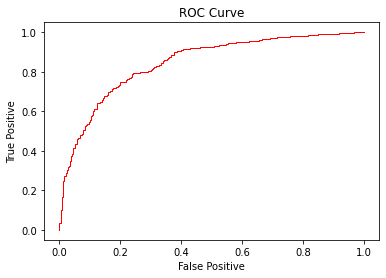

In [288]:
#EXTRA AND NOT IMPORTANT
import matplotlib.pyplot as plt
y_pred_test_prob=M.predict_proba(x_test)[:,2] 
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred_test_prob,pos_label=2)      # positive label = 2 difícil.     
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()                                  